In [31]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import yaml

from analysis.metrics import return_period_bins, ensemble_return_period_amplitude, corr_truth_train_model
from analysis.io_utils import data2density
from analysis.plot_config import params, contourLevels, colormap
plt.rcParams.update(params)

root_emulator_dir = '/home/exouser/karan/2DTurbDiffusion_cnditional/results/UDM_MultiGPU2/UDM_s3_Oaw_lrC1e4_wd1e6_e800/'
# root_emulator_dir = '/home/exouser/karan/2DTurbDiffusion_cnditional/results/cond0_step3_prev2_2500/'
run_num = 1 # For Conditonal DM
analysis_dir_train = '/home/exouser/karan/2DTurbDiffusion_cnditional/eval/results/train_step3_37500_45000/analysis/train/'
# analysis_dir_truth = '/home/exouser/karan/2DTurbDiffusion_cnditional/eval/results/truth_step1_100000/analysis/truth/'
analysis_dir_truth = '/home/exouser/karan/2DTurbDiffusion_cnditional/eval/results/truth_step3_5000_305000/analysis/truth/'
# analysis_dir_truth = '/home/exouser/karan/2DTurbDiffusion_cnditional/eval/results/truth_step3_305000_605000/analysis/truth/'


yaml_files = glob.glob(os.path.join(root_emulator_dir, "*.yaml"))
# Load the first .yaml file found
with open(yaml_files[0], 'r') as f:
    emulator_config = yaml.safe_load(f)
diffusion_config = emulator_config['diffusion_params']
model_config = emulator_config['model_params']

if diffusion_config['conditional']:
    analysis_dir_emulator = os.path.join(root_emulator_dir, "analysis", "emulator", str(run_num))
    plt_save_dir = os.path.join(root_emulator_dir, "figures", str(run_num))
else:
    analysis_dir_emulator = os.path.join(root_emulator_dir, "analysis", "emulator")
    plt_save_dir = os.path.join(root_emulator_dir, "figures")
os.makedirs(plt_save_dir, exist_ok=True)


analysis_dir_arr = [analysis_dir_truth, analysis_dir_train , analysis_dir_emulator]  

label = [r"Truth", r"Train", r"UDM"]
colors_markers = ['-k', '--r', '-.b']
color=['k', 'r', 'b']

Lx, Ly = 2*np.pi, 2*np.pi
Nx, Ny = model_config['im_size'], model_config['im_size']

dt_DNS = 0.0005
dt_emulator = 0.02

Loading Zonal U from /home/exouser/karan/2DTurbDiffusion_cnditional/eval/results/truth_step3_5000_305000/analysis/truth/zonal_U.npz


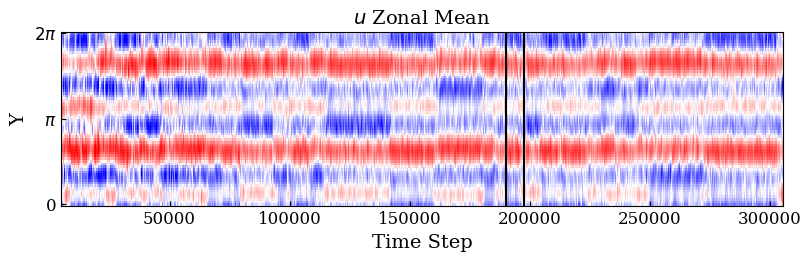

<Figure size 640x480 with 0 Axes>

In [ ]:
################### Zonal Mean ###################

flow_variable = ['U']
analysis_dir_arr = [analysis_dir_truth]  
subsample = 100  # Subsample factor for the x-axis
yline =190000  # Time steps for vertical lines
for var in flow_variable:

    fig, ax = plt.subplots(1,1,figsize=(8, 2.5), layout="compressed")  # Adjust figure size as needed

    for i, analysis_dir in enumerate(analysis_dir_arr):

        data = np.load(analysis_dir + f"zonal_{var}.npz")
        print(f"Loading Zonal {var} from {analysis_dir}zonal_{var}.npz")

        if var == 'U':
            var_zonal = data['U_zonal']
            title = r'$u$'
        elif var == 'V':
            var_zonal = data['V_zonal']
            title = r'$v$'
        elif var == 'Omega':
            var_zonal = data['Omega_zonal']
            title = r'$\omega$'

        var_zonal = var_zonal[::subsample]

        x_axis = np.linspace(5000, var_zonal.shape[0]*subsample*3 + 5000, var_zonal.shape[0])
        yaxis = np.linspace(0, 2 * np.pi, Ny)

        vmax = 0.8*np.max(np.abs(var_zonal))
        contour = ax.pcolor(x_axis, yaxis, var_zonal.T, cmap=colormap, vmax=vmax, vmin=-vmax)
        # Add vertical lines at specific time steps
        ax.axvline(x=yline, color='k' )
        ax.axvline(x=yline+7500, color='k')


        ax.set_yticks([0, np.pi, 2*np.pi])
        ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])

        ax.set_xlabel(r'$dt$')
        ax.set_ylabel('Y')
        ax.set_title(title + ' Zonal Mean')

        plt.show()
        plt.savefig(plt_save_dir + '/spectra.png', dpi=600, bbox_inches='tight')
